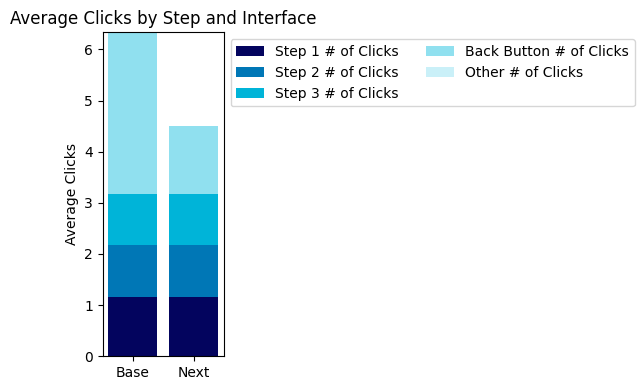

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_base = pd.read_csv('base.csv')
df_base['Interface'] = 'Base'
df_next = pd.read_csv('next.csv')
df_next['Interface'] = 'Next'

df = pd.concat([df_base, df_next], ignore_index=True)
df.columns = df.columns.str.strip()

click_cols = ['Step 1 # of Clicks', 'Step 2 # of Clicks', 'Step 3 # of Clicks', 'Back Button # of Clicks','Other # of Clicks']
df[click_cols] = df[click_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

means = df.groupby('Interface')[click_cols].mean()
bottom = np.zeros(len(means))
colors = ['#03045e', '#0077b6', '#00b4d8', '#90e0ef', '#caf0f8']
plt.figure(figsize=(6,4))
for i, j in zip(click_cols, colors):
    plt.bar(means.index, means[i], bottom=bottom, label=i, color=j)
    bottom += means[i].values

plt.ylabel('Average Clicks')
plt.title('Average Clicks by Step and Interface')
plt.legend(ncol=2, bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.show()

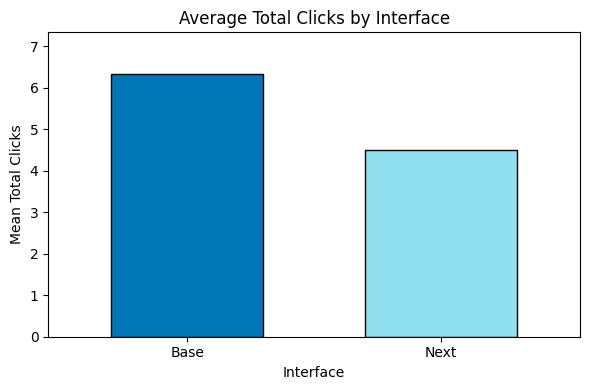

In [3]:
df['Total_Clicks'] = df[click_cols].sum(axis=1)

click_means = df.groupby('Interface')['Total_Clicks'].mean()
plt.figure(figsize=(6,4))
click_means.plot(kind='bar', color=['#0077b6', '#90e0ef'], edgecolor='black', width=0.6)
plt.ylabel('Mean Total Clicks')
plt.title('Average Total Clicks by Interface')
plt.ylim(0, click_means.max() + 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

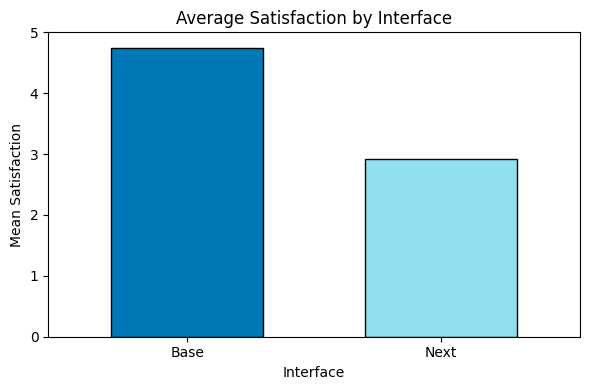

In [ ]:
s = 'Satisfaction rate (1-5)'
df[s] = pd.to_numeric(df[s], errors='coerce')
sat_means = df.groupby('Interface')[s].mean()

plt.figure(figsize=(6,4))
sat_means.plot(kind='bar', color=['#0077b6', '#90e0ef'], edgecolor='black', width=0.6)
plt.ylabel('Mean Satisfaction')
plt.title('Average Satisfaction by Interface')
plt.ylim(0, 5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()